# Brazilian Real State: Best Renting Locations in São Paulo

### Case description

#### A Real State company called "Rich Buildings" wishes to buy a property in São Paulo City, Brazil, to rent/sell it for a high price to the senior audience.

The company hires you as a freelancer data science and in a requirements meeting they set up their expectations:

1) Find out what neighborhoods have the best cost benefit for square meters (top 5).

2) For each one of those top 5 neighborhoods, find out: The most frequent top 5 venues.

3) Group similar neighborhoods based on the venues nearby.

Your goal is to provide the company the insights they need to help making the decision: Which neighborhood is the best choice for buying a property based on the targeted audience?

### Dataset

#### Foursquare API: https://foursquare.com/

#### Geocoder: https://geocoder.readthedocs.io/

#### Apartment Prices by Felipecabueno - Kaggle: https://www.kaggle.com/felipecabueno/apartment-prices-in-sao-paulo-br-2020

#### The Apartment Prices dataset cointains 7 columns regarding the attributes of the apartments located in the city of São Paulo, Brazil. The attributes are:

Neighborhood, Square Meters, Number of Bedrooms, Number of Bathrooms, Suites, Parking Spaces and Final Price.



#### The datasets will be used to perform the following anaylsis:

1) Price estimation based on coordinates (regression).

2) Find out the highest square_meters/price ratio and order top n descending (initial n = 10).

3) Clustering of the apartments' features to see if there is any hidden pattern (exploratory analysis/maybe cluster the square_meters/price ratio).

4) Clustering of the nearby venues. This will give the stakeholders the insights for what type of neighborhood is the one in question.

### Part 1: Dataset reading and pre-processing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("apartments_sp.csv")

In [3]:
df.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
0,bras,57,2,1,0,1,385.185
1,santa cecilia,430,4,3,0,5,3200.000
2,bras,57,2,1,0,1,410.000
3,santa cecilia,250,4,3,0,2,1200.000
4,consolacao,177,3,3,0,1,1390.000


In [4]:
df.describe()

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
count,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000
mean,128.062345,2.860664,2.467045,0.763357,1.844870,995.773735
std,93.374991,0.783342,1.266961,1.069804,1.014796,858.878453
min,23.000000,1.000000,1.000000,0.000000,1.000000,100.000000
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000
75%,160.000000,3.000000,3.000000,1.000000,2.000000,1272.000000
max,864.000000,8.000000,10.000000,8.000000,10.000000,11000.000000


In [5]:
df['neighborhood'].unique().size

680

#### Let us create a new column named Cost Benefit Ratio.

#### 1. Cost Benefit Ratio list creation

In [6]:
cb_ratio_list = []

for value in df.values:
    #print(value)
    cb_ratio = value[6]/value[1]
    cb_ratio_list.append(cb_ratio)
print(cb_ratio_list)

[6.757631578947368, 7.441860465116279, 7.192982456140351, 4.8, 7.853107344632768, 6.309523809523809, 5.2, 12.074626865671641, 10.0, 7.731958762886598, 5.0, 7.6923076923076925, 3.2758620689655173, 7.142857142857143, 6.8493150684931505, 7.885714285714286, 3.7735849056603774, 9.6875, 3.68, 3.58974358974359, 12.631578947368421, 11.11111111111111, 7.705208333333334, 6.834491525423729, 12.5, 6.352941176470588, 5.925925925925926, 5.972222222222222, 10.0, 11.756756756756756, 4.775, 6.815068493150685, 8.275862068965518, 6.774193548387097, 6.0, 6.857142857142857, 4.339622641509434, 4.166666666666667, 11.887096774193548, 7.350364963503649, 12.571428571428571, 5.8441558441558445, 6.533333333333333, 7.857142857142857, 5.666666666666667, 2.1459227467811157, 7.0, 7.042253521126761, 10.0, 9.538461538461538, 4.292929292929293, 4.717741935483871, 5.9375, 4.0, 3.4444444444444446, 3.3333333333333335, 4.545454545454546, 2.8448275862068964, 6.65, 1.7846153846153847, 6.0, 14.029411764705882, 21.8823529411764

#### 2. Dataframe column creation

In [7]:
df = df.assign(cost_benefit_ratio = cb_ratio_list)
df.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
0,bras,57,2,1,0,1,385.185,6.757632
1,santa cecilia,430,4,3,0,5,3200.000,7.441860
2,bras,57,2,1,0,1,410.000,7.192982
3,santa cecilia,250,4,3,0,2,1200.000,4.800000
4,consolacao,177,3,3,0,1,1390.000,7.853107


In [8]:
df_original = df.copy() # Keeping the original Dataframe stored in memory.
df_original.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
0,bras,57,2,1,0,1,385.185,6.757632
1,santa cecilia,430,4,3,0,5,3200.000,7.441860
2,bras,57,2,1,0,1,410.000,7.192982
3,santa cecilia,250,4,3,0,2,1200.000,4.800000
4,consolacao,177,3,3,0,1,1390.000,7.853107


In [9]:
df.describe()

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
count,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000
mean,128.062345,2.860664,2.467045,0.763357,1.844870,995.773735,7.660900
std,93.374991,0.783342,1.266961,1.069804,1.014796,858.878453,2.802283
min,23.000000,1.000000,1.000000,0.000000,1.000000,100.000000,1.407895
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000,5.675931
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000,7.272727
75%,160.000000,3.000000,3.000000,1.000000,2.000000,1272.000000,9.260172
max,864.000000,8.000000,10.000000,8.000000,10.000000,11000.000000,24.793388


In [10]:
previsores = df.iloc[:,0:5].values
classe = df.iloc[:,6].values

#### 3. Label Encoding

We will transform the column Neighborhood in ordinal numbers, to check for possible correlation in correlation matrix and to test it in the regression model.

In [11]:
# Defining and using a Categorical Feature transform to Numerical ordinal feature.

from sklearn.preprocessing import LabelEncoder

def NeighborhoodToNumerical(previsores):

    label_encoder = LabelEncoder()

    previsores[:,0] = label_encoder.fit_transform(previsores[:,0])

NeighborhoodToNumerical(previsores)
print(previsores)

[[23 57 2 1 0]
 [409 430 4 3 0]
 [23 57 2 1 0]
 ...
 [404 267 3 5 3]
 [113 171 4 5 2]
 [413 150 4 5 3]]


In [12]:
# Updating the first column of the df Dataframe to numerical variable

j = 0
for value in df.values:
    #print(value)
    #print(previsores[j,0])
    df.iloc[j,0] = float(previsores[j,0])
    #print(df.values[j,0])
    j = j + 1
    #if j == 10:
        #break

In [13]:
# Creating the Standardization function.

from sklearn.preprocessing import StandardScaler

def StdScaler(df):

    std_scaler = StandardScaler()
    df = pd.DataFrame(std_scaler.fit_transform(df))
    return df

df = StdScaler(df)

In [14]:
# Renaming Dataframe columns.

df.columns = ['neighborhood', 'square_meters','bedrooms','bathrooms','suites','parking_spaces','final_price','cost_benefit_ratio']

#### 4. Correlation and Histogram/Frequency Analysis


In this step it is important to do this pre-analysis in order to choose correctly the features that will enter the regression model.

1. Pearson Correlation

In [15]:
#df['neighborhood'] = df['neighborhood'].astype('float64')
df.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
0,-1.560607,-0.761067,-1.098742,-1.157961,-0.713571,-0.832578,-0.710937,-0.322343
1,0.363636,3.233706,1.454502,0.420670,-0.713571,3.109225,2.566482,-0.078167
2,-1.560607,-0.761067,-1.098742,-1.157961,-0.713571,-0.832578,-0.682043,-0.166983
3,0.363636,1.305934,1.454502,0.420670,-0.713571,0.152873,0.237790,-1.020950
4,-1.181740,0.524115,0.177880,0.420670,-0.713571,-0.832578,0.459016,0.068592


In [16]:
corr_matrix = df.corr(method='pearson')

In [17]:
corr_matrix

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
neighborhood,1.000000,-0.054609,0.021084,-0.001236,0.009732,0.031689,-0.082948,-0.064216
square_meters,-0.054609,1.000000,0.647606,0.695954,0.587570,0.694003,0.794495,0.056186
bedrooms,0.021084,0.647606,1.000000,0.659658,0.510709,0.622862,0.565100,0.079044
bathrooms,-0.001236,0.695954,0.659658,1.000000,0.804254,0.720309,0.660650,0.239871
suites,0.009732,0.587570,0.510709,0.804254,1.000000,0.661981,0.567129,0.192040
parking_spaces,0.031689,0.694003,0.622862,0.720309,0.661981,1.000000,0.672842,0.216090
final_price,-0.082948,0.794495,0.565100,0.660650,0.567129,0.672842,1.000000,0.532672
cost_benefit_ratio,-0.064216,0.056186,0.079044,0.239871,0.192040,0.216090,0.532672,1.000000


We can use Scalar Standardization because variables represents numerical quantity, not just a numerical label with no real meaning. We see what happened to the column Neighborhood, the correlation is around zero for that same reason, it is a label transform.

We can observe the following points of interest in this Pearson correlation matrix:

1. The top 3 variables that are correlated to the final price are: Square Meters, Number of Parking Spaces, Number of Bathrooms.

2. The correlation of Square Meters and Number of Bathrooms is around 0.7. This indicates a possibly strong correlation, could mean that the room that most impacts the value of the apartment is the number of bathrooms. In 2nd place we have Square Meters and Number of Parking Spaces.

3. We will perform 3 types of price analysis using the 'group by' command, clustering and color scaling latter on, to see which of the neighborhoods are the most expensive.

2. Histogram

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'cost_benefit_ratio'}>],
       [<AxesSubplot:title={'center':'final_price'}>,
        <AxesSubplot:title={'center':'parking_spaces'}>,
        <AxesSubplot:title={'center':'square_meters'}>],
       [<AxesSubplot:title={'center':'suites'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

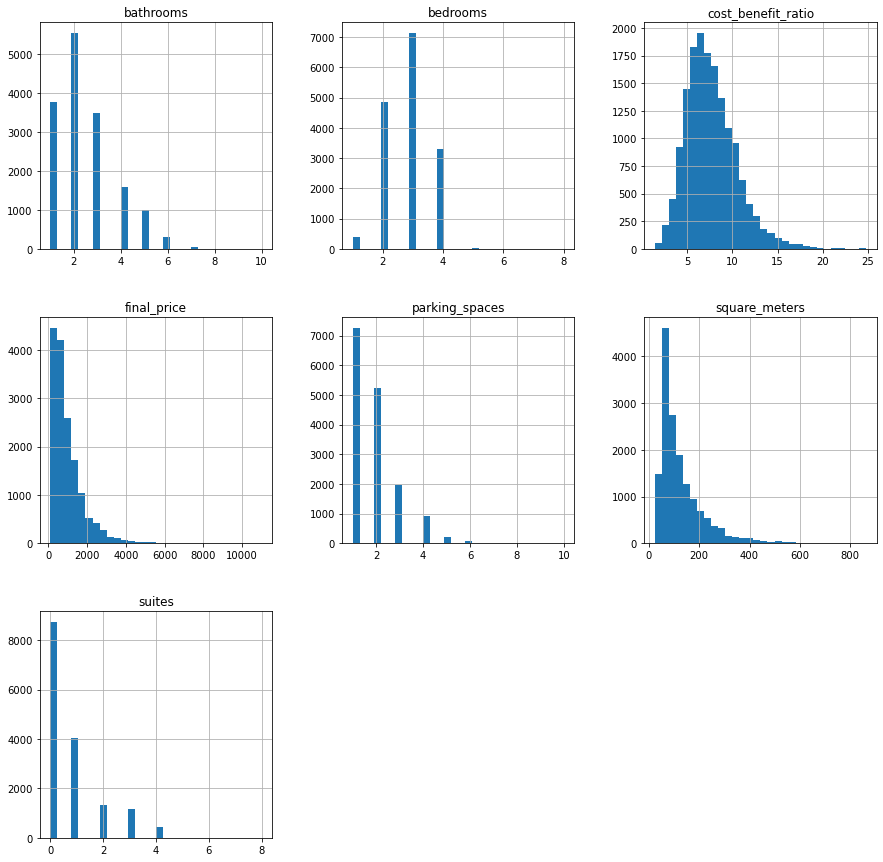

In [18]:
df_original.hist(figsize=(15,15), bins=30)

In [19]:
# Mean of the Cost Benefit Ratio.
df_original['cost_benefit_ratio'].values.mean()

7.660899921316368

In [20]:
# Maximum value of the Cost Benefit Ratio.
df_original['cost_benefit_ratio'].values.min()

1.4078947368421053

In [21]:
# Mean of the Square Meters.
df_original['square_meters'].mean()

128.06234477488377

The histograms show the most frequent occurrences for all the features in the Dataframe.

The most frequent features are listed below:

1. Bathrooms = 2
2. Bedrooms = 3
3. Cost Benefit Mean = BRL 7660,00 per meter squared
4. Maximum Cost Benefit = BRL 1408,00 per meter squared
5. Final Price Mean = BRL 995.000,00
6. Parking Spaces = 1
7. Square Meters Mean = 128,06 m^2
8. Suites = 1

#### 5. Regression pre-processsing pipeline

First we shall transform categorical variables into integer numbers, and have 2 datasets: df and df_onehot. df_onehot will be used to test the One Hot Encoding.

In [22]:
# One Hot Encoding transform.


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

reg_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('std_scaler', StandardScaler())])
regdf = reg_pipeline.fit_transform(previsores)

#### 6. Coordinates extraction using Geocoder

In [24]:
postal_codes = list(df_original['neighborhood'].to_list())
print(postal_codes)

['bras', 'santa cecilia', 'bras', 'santa cecilia', 'consolacao', 'santa cecilia', 'bela vista', 'cerqueira cesar', 'cerqueira cesar', 'bom retiro', 'republica', 'bela vista', 'campos eliseos', 'santa cecilia', 'bela vista', 'barra funda', 'santa cecilia', 'santa cecilia', 'liberdade', 'santa cecilia', 'santa cecilia', 'parque industrial tomas edson', 'luz', 'bras', 'santa cecilia', 'santa cecilia', 'barra funda', 'santa cecilia', 'santa cecilia', 'bela vista', 'cerqueira cesar', 'consolacao', 'liberdade', 'bras', 'barra funda', 'santa cecilia', 'liberdade', 'liberdade', 'santa cecilia', 'barra funda', 'varzea da barra funda', 'bela vista', 'bela vista', 'santa cecilia', 'barra funda', 'bom retiro', 'consolacao', 'cerqueira cesar', 'santa cecilia', 'jardim sao paulo', 'tatuape', 'jardim prudencia', 'jardim itapeva', 'vila olimpia', 'itaim paulista', 'parada xv de novembro', 'itaquera', 'conjunto residencial jose bonifacio', 'barra funda', 'colonia', 'mooca', 'cerqueira cesar', 'itaim bi

In [25]:
import geocoder # import geocoder
from time import sleep

#initialize your variable to None
lat_lng_coords = None
latlng_list = []

postal_codes = ['01000-xxx']
postal_codes = ['bras', 'santa cecilia']


#loop until you get the coordinates
for postal_code in postal_codes:
    sleep(1)
    print(postal_code)
    while(lat_lng_coords is None):
        print("Entrou no loop Geocoder")
        g = geocoder.arcgis('{}, São Paulo, São Paulo'.format(postal_code))
        lat_lng_coords = g.latlng
        print("lat_lng_coords = ", lat_lng_coords)
        sleep(1)
    latlng_list.append(lat_lng_coords)
    print(lat_lng_coords)
    #latitude = lat_lng_coords[0]
    #longitude = lat_lng_coords[1]
    lat_lng_coords = None
print(latlng_list)

bras
Entrou no loop Geocoder
lat_lng_coords =  [-23.542769999999962, -46.61999999999995]
[-23.542769999999962, -46.61999999999995]
santa cecilia
Entrou no loop Geocoder
lat_lng_coords =  [-23.535919999999976, -46.657749999999965]
[-23.535919999999976, -46.657749999999965]
[[-23.542769999999962, -46.61999999999995], [-23.535919999999976, -46.657749999999965]]


### Part 2: Estimation of Apartments' Price - Regression Modeling

#### 1. Scatter Plot

Let's use scatter plots and residual analysis to see if a Linear model is adequate to the estimation.

### Part 3: Dataframe Cost Benefit Ratio Analysis

In [26]:
df.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
0,-1.560607,-0.761067,-1.098742,-1.157961,-0.713571,-0.832578,-0.710937,-0.322343
1,0.363636,3.233706,1.454502,0.420670,-0.713571,3.109225,2.566482,-0.078167
2,-1.560607,-0.761067,-1.098742,-1.157961,-0.713571,-0.832578,-0.682043,-0.166983
3,0.363636,1.305934,1.454502,0.420670,-0.713571,0.152873,0.237790,-1.020950
4,-1.181740,0.524115,0.177880,0.420670,-0.713571,-0.832578,0.459016,0.068592


In [27]:
df.describe()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
count,1.570300e+04,1.570300e+04,1.570300e+04,1.570300e+04,1.570300e+04,1.570300e+04,1.570300e+04,1.570300e+04
mean,-3.619908e-17,1.303167e-16,-2.171945e-16,-1.447963e-16,7.239816e-18,-3.619908e-17,7.239816e-18,1.954750e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-1.675264e+00,-1.125202e+00,-2.375365e+00,-1.157961e+00,-7.135715e-01,-8.325781e-01,-1.042991e+00,-2.231468e+00
25%,-1.017233e+00,-6.753880e-01,-1.098742e+00,-3.686454e-01,-7.135715e-01,-8.325781e-01,-6.587565e-01,-7.083624e-01
50%,2.739041e-01,-3.433828e-01,1.778800e-01,-3.686454e-01,-7.135715e-01,1.528726e-01,-2.919874e-01,-1.385246e-01
75%,7.026213e-01,3.420474e-01,1.778800e-01,4.206700e-01,2.212089e-01,1.528726e-01,3.216230e-01,5.707213e-01
max,1.709608e+00,7.881780e+00,6.560992e+00,5.945878e+00,6.764672e+00,8.036478e+00,1.164838e+01,6.113956e+00
